# SEIR, multiple
{func}`.SEIR_Multiple`

Multiple SEIR coupled together, without any birth death process.

$$\begin{aligned}
\frac{dS_{i}}{dt} &= dN_{i} - dS_{i} - \lambda_{i}S_{i} \\
\frac{dE_{i}}{dt} &= \lambda_{i}S_{i} - (d+\epsilon)E_{i} \\
\frac{dI_{i}}{dt} &= \epsilon E_{i} - (d+\gamma) I_{i} \\
\frac{dR_{i}}{dt} &= \gamma I_{i} - dR_{i}
\end{aligned}$$

where

$$\lambda_{i} = \sum_{j=1}^{n} \beta_{i,j} I_{j} (1\{i\neq j\} p)$$

with $n$ being the number of patch and $p$ the coupled factor.

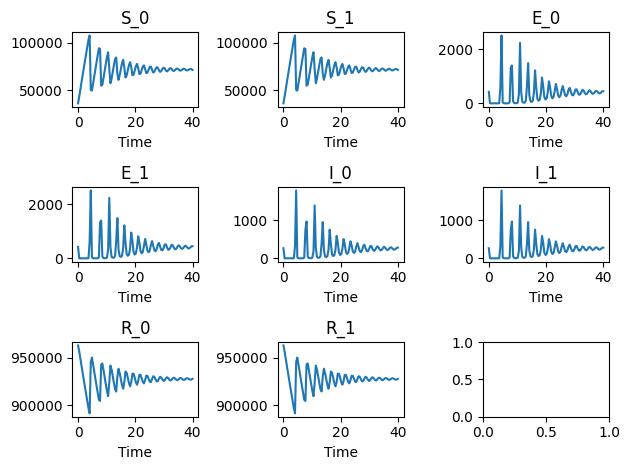

In [1]:
from pygom import common_models

import numpy

paramEval = {'beta_00':0.0010107, 'beta_01':0.0010107, 'beta_10':0.0010107, 'beta_11':0.0010107,
             'd':0.02, 'epsilon':45.6, 'gamma':73.0, 'N_0':10**6,'N_1':10**6,'p':0.01}

x0 = [36139.3224081278, 422.560577637822, 263.883351688369, 963174.233662546]

ode = common_models.SEIR_Multiple(param=paramEval)

t = numpy.linspace(0, 40, 100)

x01 = []

for s in x0:  
    x01 += 2*[s]

ode.initial_values = (numpy.array(x01, float),t[0])

solution, output = ode.integrate(t[1::], full_output=True)

ode.plot()



The initial conditions are those derived by using the stability
condition as stated in {cite:t}`Lloyd1996` while the notations is taken
from {cite:t}`Brauer2008`.